In [1]:
import pandas as pd
import numpy as np 
from xgboost import XGBClassifier as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import pickle

C:\Users\damindu pahasara\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\damindu pahasara\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('resampled_for_tomorrow_final.csv')

In [3]:
df.head()

,tavg,hum,Condition_En,Condition,Yesterday_Condition_En,Yesterday_Condition
0,15.1,83.0,1,Medium,0.0,Healthy
1,15.2,84.5,1,Medium,1.0,Medium
2,15.6,66.5,0,Healthy,1.0,Medium
3,15.0,80.0,1,Medium,0.0,Healthy
4,15.0,55.5,0,Healthy,1.0,Medium


In [4]:
df.info

<bound method DataFrame.info of            tavg        hum  Condition_En Condition  Yesterday_Condition_En  \
0     15.100000  83.000000             1    Medium                     0.0   
1     15.200000  84.500000             1    Medium                     1.0   
2     15.600000  66.500000             0   Healthy                     1.0   
3     15.000000  80.000000             1    Medium                     0.0   
4     15.000000  55.500000             0   Healthy                     1.0   
...         ...        ...           ...       ...                     ...   
1284  15.241346  90.793268             2      Poor                     2.0   
1285  14.743554  90.717771             2      Poor                     2.0   
1286  15.627264  93.310614             2      Poor                     2.0   
1287  14.902468  90.500000             2      Poor                     2.0   
1288  14.830106  92.500000             2      Poor                     2.0   

     Yesterday_Condition  
0   

In [5]:
df.describe()

,tavg,hum,Condition_En,Yesterday_Condition_En
count,1289.000000,1289.000000,1289.000000,1289.000000
mean,15.602199,73.967485,1.000776,0.999224
std,1.103119,17.824275,0.816655,0.816655
min,10.500000,18.000000,0.000000,0.000000
25%,14.912943,61.500000,0.000000,0.000000
50%,15.600000,75.000000,1.000000,1.000000
75%,16.300000,92.500000,2.000000,2.000000
max,19.200000,97.000000,2.000000,2.000000


In [6]:
print(df.isnull().sum())

tavg                      0
hum                       0
Condition_En              0
Condition                 0
Yesterday_Condition_En    0
Yesterday_Condition       0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print(df.isnull().sum())

tavg                      0
hum                       0
Condition_En              0
Condition                 0
Yesterday_Condition_En    0
Yesterday_Condition       0
dtype: int64


# Creating the Target Variable

In [9]:
df.head()

,tavg,hum,Condition_En,Condition,Yesterday_Condition_En,Yesterday_Condition
0,15.1,83.0,1,Medium,0.0,Healthy
1,15.2,84.5,1,Medium,1.0,Medium
2,15.6,66.5,0,Healthy,1.0,Medium
3,15.0,80.0,1,Medium,0.0,Healthy
4,15.0,55.5,0,Healthy,1.0,Medium


In [10]:
label_encoder = LabelEncoder()

df['Yesterday_Condition_EN'] = label_encoder.fit_transform(df['Yesterday_Condition'])

In [11]:
df.head()

,tavg,hum,Condition_En,Condition,Yesterday_Condition_En,Yesterday_Condition,Yesterday_Condition_EN
0,15.1,83.0,1,Medium,0.0,Healthy,0
1,15.2,84.5,1,Medium,1.0,Medium,1
2,15.6,66.5,0,Healthy,1.0,Medium,1
3,15.0,80.0,1,Medium,0.0,Healthy,0
4,15.0,55.5,0,Healthy,1.0,Medium,1


In [12]:
X = df[['tavg', 'hum']]
y = df['Yesterday_Condition_EN']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(1031, 2)

In [16]:
y_test.shape

(258,)

In [17]:
xgb = xgb(use_label_encoder=False, eval_metric='mlogloss')
cv_scores = cross_val_score(xgb, X, y, cv=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:

filename = 'env_con_model_tomorow.pkl'

with open(filename, 'wb') as file:
    pickle.dump(xgb, file)

In [19]:
y_pred = xgb.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [21]:
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Accuracy: 0.7596899224806202

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.69      0.63      0.66        89
      Medium       0.64      0.69      0.67        88
        Poor       0.96      0.98      0.97        81

    accuracy                           0.76       258
   macro avg       0.77      0.77      0.76       258
weighted avg       0.76      0.76      0.76       258



In [23]:
cv_scores = cross_val_score(xgb, X, y, cv=5)

<Figure size 576x432 with 0 Axes>

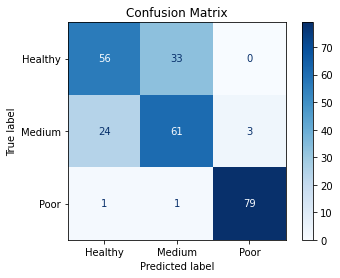

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Random Forest Classifier Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation


print(f"\nAverage Cross-Validation Accuracy: {cv_scores.mean():.2f}")


rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)



Average Cross-Validation Accuracy: 0.75

Accuracy: 0.7674418604651163

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.69      0.67      0.68        89
      Medium       0.67      0.68      0.67        88
        Poor       0.96      0.96      0.96        81

    accuracy                           0.77       258
   macro avg       0.77      0.77      0.77       258
weighted avg       0.77      0.77      0.77       258



# Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(logreg_classifier, X, y, cv=5)  


print(f"\nAverage Cross-Validation Accuracy: {cv_scores.mean():.2f}")


logreg_classifier.fit(X_train, y_train)


y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:\n", report)


Average Cross-Validation Accuracy: 0.75

Accuracy: 0.7868217054263565

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.77      0.65      0.71        89
      Medium       0.67      0.75      0.71        88
        Poor       0.93      0.98      0.95        81

    accuracy                           0.79       258
   macro avg       0.79      0.79      0.79       258
weighted avg       0.79      0.79      0.78       258

